[*********************100%***********************]  1 of 1 completed


Mean 5-year return: 9.16%
Standard deviation of 5-year returns: 15.92%
Quantiles:
5%: -17.74%
10%: -12.21%
25%: -0.65%
50% (Median): 10.28%
75%: 19.71%
90%: 28.71%
95%: 33.81%


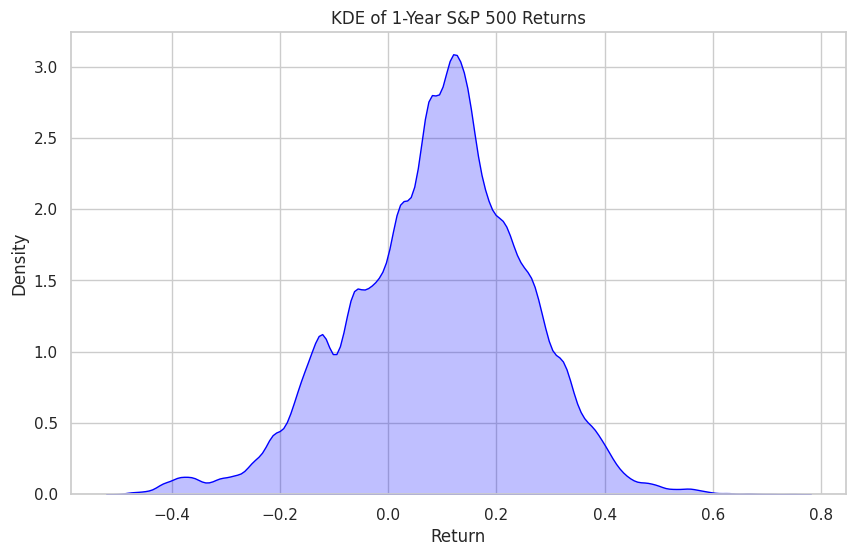

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Download historical S&P 500 data
ticker = '^GSPC'  # S&P 500 ticker
data = yf.download(ticker, start="1950-01-01")  # Downloading from 1950 for more coverage

# Step 2: Filter for only 'Close' prices
close_prices = data['Close']

# Step 3: Define the length of a five-year period in trading days (~252 trading days per year)
N_YEARS = 1
days_in_five_years = 252 * N_YEARS

# Step 4: Select 1000 random five-year periods and calculate returns
n_samples = len(close_prices) - days_in_five_years
returns = []

for i in range(n_samples):
    # Random start point
    # start_idx = np.random.randint(0, len(close_prices) - days_in_five_years)
    start_idx = i
    # Extract the prices for the five-year period
    start_price = close_prices.iloc[start_idx]
    end_price = close_prices.iloc[start_idx + days_in_five_years]
    # Calculate the return
    five_year_return = (end_price - start_price) / start_price
    returns.append(five_year_return)

# Step 5: Analyze the results (mean, standard deviation, and distribution)
returns = np.array(returns)
mean_return = np.mean(returns)
std_return = np.std(returns)

# Quantiles
quantiles = np.percentile(returns, [5, 10, 25, 50, 75, 90, 95])

# Print the results
print(f'Mean {N_YEARS}-year return: {mean_return:.2%}')
print(f'Standard deviation of {N_YEARS}-year returns: {std_return:.2%}')
print(f'Quantiles:')
print(f'5%: {quantiles[0]:.2%}')
print(f'10%: {quantiles[1]:.2%}')
print(f'25%: {quantiles[2]:.2%}')
print(f'50% (Median): {quantiles[3]:.2%}')
print(f'75%: {quantiles[4]:.2%}')
print(f'90%: {quantiles[5]:.2%}')
print(f'95%: {quantiles[6]:.2%}')

# Step 6: Plot the KDE plot of the returns distribution using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.kdeplot(returns, fill=True, bw_adjust=0.5, color='blue')
plt.title(f'KDE of {N_YEARS}-Year S&P 500 Returns')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()


# Sharpe Ratio

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Mean Sharpe Ratio: 0.43
Standard deviation of Sharpe Ratios: 1.13
Quantiles:
5%: -1.51
10%: -1.07
25%: -0.39
50% (Median): 0.44
75%: 1.23
90%: 1.87
95%: 2.25


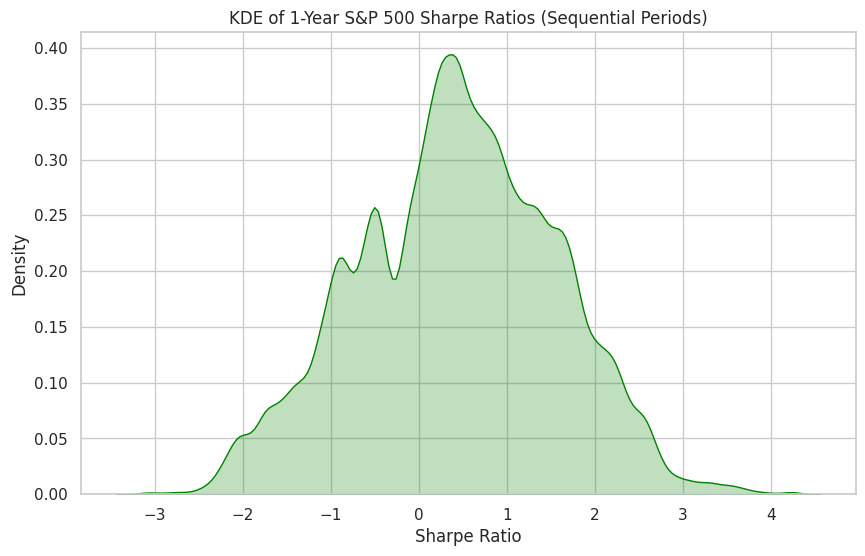

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Download historical S&P 500 data and risk-free rate (1-Year Treasury Bill)
ticker_sp500 = '^GSPC'  # S&P 500 ticker
ticker_tbill = '^IRX'  # 13-week T-bill (proxy for risk-free rate)
data_sp500 = yf.download(ticker_sp500, start="1950-01-01")
data_tbill = yf.download(ticker_tbill, start="1950-01-01")

# Step 2: Filter for only 'Close' prices (for S&P 500) and 'Adj Close' for T-Bill rate
close_prices = data_sp500['Close']

# Convert T-Bill rates (given as percentages) to daily risk-free rate
# T-Bill rate is given as an annualized percentage, we divide by 100 and 252 (trading days) for the daily rate
tbill_daily_rate = (data_tbill['Adj Close'] / 100) / 252

close_prices = close_prices[close_prices.index.isin(set(tbill_daily_rate.index))]
tbill_daily_rate = tbill_daily_rate[tbill_daily_rate.index.isin(set(close_prices.index))]

# Step 3: Define the length of a five-year period in trading days (~252 trading days per year)
N_YEARS = 1
trading_days_per_year = 252
days_in_five_years = trading_days_per_year * N_YEARS

# Step 4: Calculate Sharpe ratios for sequential five-year periods
sharpe_ratios = []

# Iterate sequentially over all possible five-year periods
for start_idx in range(0, len(close_prices) - days_in_five_years):
    # Extract prices and risk-free rate for the five-year period
    period_prices = close_prices.iloc[start_idx:start_idx + days_in_five_years]
    period_risk_free = tbill_daily_rate.iloc[start_idx:start_idx + days_in_five_years].mean() * 252  # Annualize average daily rate

    # Calculate daily returns
    daily_returns = period_prices.pct_change().dropna()
    # Calculate total return over the period
    cumulative_return = (period_prices.iloc[-1] - period_prices.iloc[0]) / period_prices.iloc[0]
    # Annualize the return
    annualized_return = (1 + cumulative_return) ** (1 / N_YEARS) - 1
    # Annualize volatility (standard deviation of daily returns)
    annualized_volatility = daily_returns.std() * np.sqrt(trading_days_per_year)
    # Calculate Sharpe ratio
    sharpe_ratio = (annualized_return - period_risk_free) / annualized_volatility
    sharpe_ratios.append(sharpe_ratio)

# Step 5: Analyze the results (mean, standard deviation, and distribution of Sharpe ratios)
sharpe_ratios = np.array(sharpe_ratios)
mean_sharpe = np.mean(sharpe_ratios)
std_sharpe = np.std(sharpe_ratios)

# Quantiles
quantiles = np.percentile(sharpe_ratios, [5, 10, 25, 50, 75, 90, 95])

# Print the results
print(f'Mean Sharpe Ratio: {mean_sharpe:.2f}')
print(f'Standard deviation of Sharpe Ratios: {std_sharpe:.2f}')
print(f'Quantiles:')
print(f'5%: {quantiles[0]:.2f}')
print(f'10%: {quantiles[1]:.2f}')
print(f'25%: {quantiles[2]:.2f}')
print(f'50% (Median): {quantiles[3]:.2f}')
print(f'75%: {quantiles[4]:.2f}')
print(f'90%: {quantiles[5]:.2f}')
print(f'95%: {quantiles[6]:.2f}')

# Step 6: Plot the KDE plot of the Sharpe ratio distribution using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.kdeplot(sharpe_ratios, fill=True, bw_adjust=0.5, color='green')
plt.title(f'KDE of {N_YEARS}-Year S&P 500 Sharpe Ratios (Sequential Periods)')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Density')
plt.show()
